<a href="https://colab.research.google.com/github/musicjae/intro_to_python/blob/master/Pytorch/pytorch_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References  
[1] https://github.com/gyunggyung/PyTorch

# Basic

### tensor,numpy,slicing etc

In [1]:
import numpy as np
import torch
torch.manual_seed(1)
print(torch.__version__)

1.7.0+cu101


In [2]:
x= torch.Tensor(4,3,2,1)
print(x.numel())

24


torch.Tensor()라고 명시적으로 사용하지 않아도 텐서 출력 가능

In [3]:
x2=torch.eye(3,3)
print(x2, type(x2))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]) <class 'torch.Tensor'>


In [9]:
x3=torch.rand(3,3)
print(x3,type(x3))

tensor([[0.7570, 0.2346, 0.6471],
        [0.3556, 0.4452, 0.0193],
        [0.2616, 0.7713, 0.3785]]) <class 'torch.Tensor'>


In [10]:
x4=torch.rand(3,3)
print(x4,type(x4))

tensor([[0.9980, 0.9008, 0.4766],
        [0.1663, 0.8045, 0.6552],
        [0.1768, 0.8248, 0.8036]]) <class 'torch.Tensor'>


- numpy -> tensor  
- tensor -> numpy

In [13]:
num = np.arange(12).reshape(3,4)
x5=torch.from_numpy(num)
print(x5)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [17]:
x5.numpy()

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [26]:
x6=torch.Tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x6)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [28]:
x6[0:1,:]=torch.Tensor([12,32,42])
print(x6)

tensor([[12., 32., 42.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.]])


In [37]:
t7=torch.split(x6, split_size_or_sections=1,dim=0)

In [36]:
print(t7[0])
print(t7)

tensor([[12., 32., 42.]])
(tensor([[12., 32., 42.]]), tensor([[4., 5., 6.]]), tensor([[7., 8., 9.]]))


In [41]:
torch.cat(t7)

tensor([[12., 32., 42.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.]])

In [42]:
torch.stack(t7,dim=0) # 실행 시 마다 스택이 계속 쌓인다

tensor([[[12., 32., 42.]],

        [[ 4.,  5.,  6.]],

        [[ 7.,  8.,  9.]]])

### view,(un)squeeze

In [45]:
x8=torch.ones(1,2,2)
print(x8,x8.shape)

tensor([[[1., 1.],
         [1., 1.]]]) torch.Size([1, 2, 2])


In [46]:
x8.view(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [47]:
x8.view(-1) # flattening

tensor([1., 1., 1., 1.])

In [50]:
x8.view(-1,4) # auto resize

tensor([[1., 1., 1., 1.]])

In [51]:
x9=x8.squeeze()

In [53]:
print(x9,'\n\n',x8)

tensor([[1., 1.],
        [1., 1.]]) 

 tensor([[[1., 1.],
         [1., 1.]]])


- unsqueeze: tensor shape에 대해, 맨 앞에 1 추가

In [62]:
x9=x8.unsqueeze(0)
print(x8.dim(),x9.dim())
print(x8.shape,x9.shape)

3 4
torch.Size([1, 2, 2]) torch.Size([1, 1, 2, 2])


In [64]:
x10=x8.squeeze(0)

- squeeze: tensor shape에 대해, 맨 앞에 1 삭제

In [65]:
print(x8.dim(),x10.dim())
print(x8.shape,x10.shape)

3 2
torch.Size([1, 2, 2]) torch.Size([2, 2])


# Autograd

In [67]:
from torch.autograd import Variable

In [68]:
tensor = torch.rand(2,2,)
x = Variable(tensor, requires_grad=True)

tensor, x

(tensor([[0.5730, 0.1205],
         [0.1452, 0.7720]]), tensor([[0.5730, 0.1205],
         [0.1452, 0.7720]], requires_grad=True))

In [73]:
print(x.volatile)

False


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: volatile was removed (Variable.volatile is always False)
  """Entry point for launching an IPython kernel.


In [74]:
x = Variable(torch.FloatTensor([3]), requires_grad=True)

y = x**3 + 3

z  = Variable(torch.FloatTensor([5]))

x.requires_grad, y.requires_grad, z.requires_grad, y

(True, True, False, tensor([30.], grad_fn=<AddBackward0>))

# 3 Linear Regression 

In [75]:
import torch
from torch.autograd import Variable
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(3)

### 3.1 training set

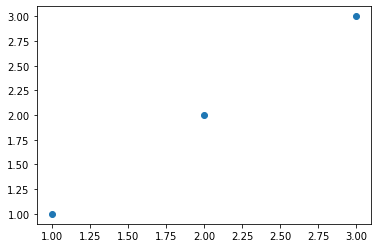

torch.Size([3, 1])


In [108]:
x_train = torch.Tensor([[1],[2],[3]])
y_train = torch.Tensor([[1],[2],[3]])

x, y = Variable(x_train), Variable(y_train)

plt.scatter(x.data, y.data)
plt.show()
print(x.data.shape)

### Weights

In [82]:
W = Variable(torch.rand(1,1))
print(x.mm(W)) # x * W

tensor([[0.4716],
        [0.9432],
        [1.4148]])


### loss fn  
 
$loss(x,y)=\frac{1}{n}\sum|x_i−y_i|^2$

In [85]:
loss_fn = nn.MSELoss()

### Training

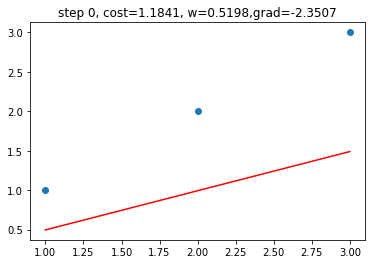

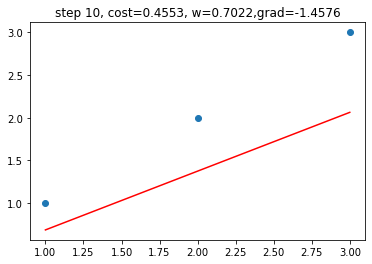

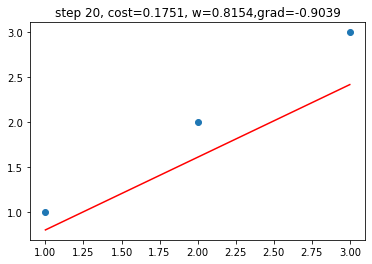

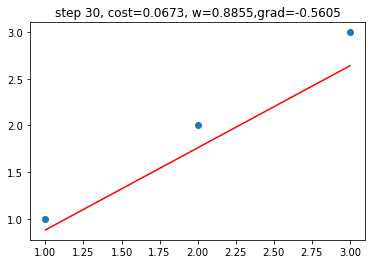

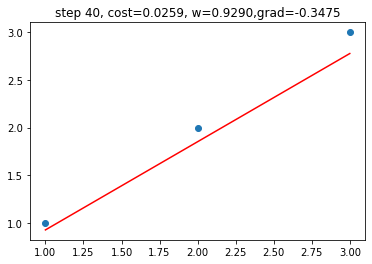

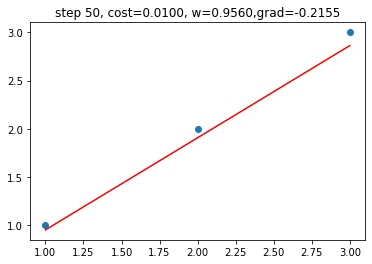

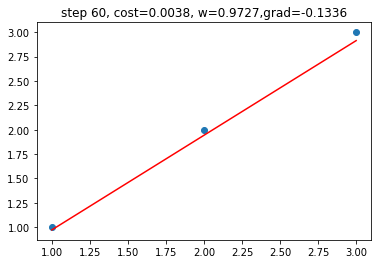

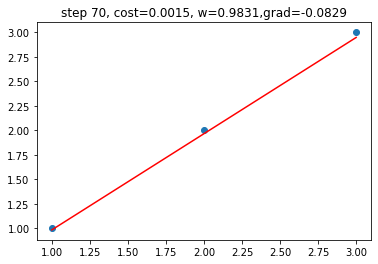

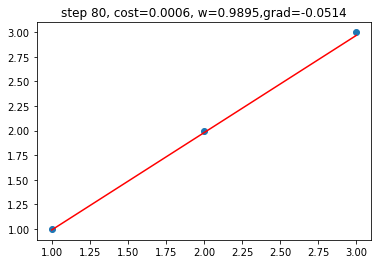

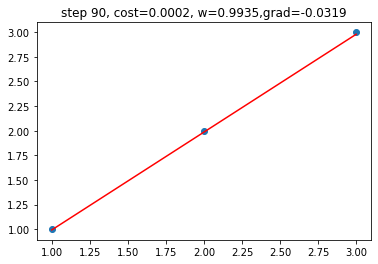

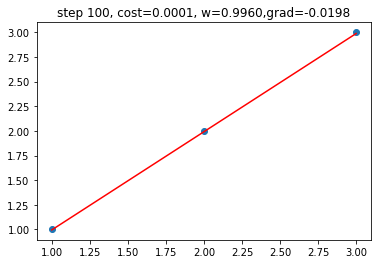

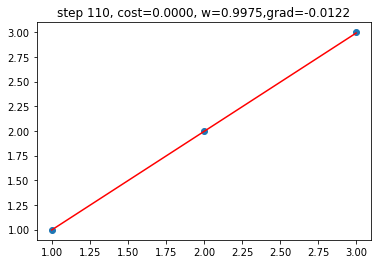

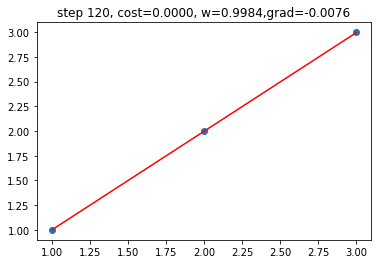

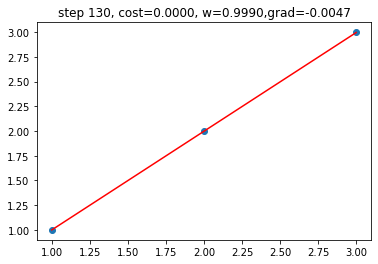

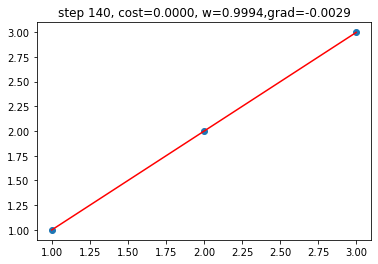

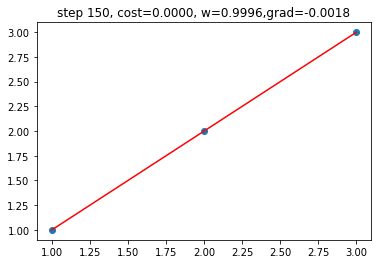

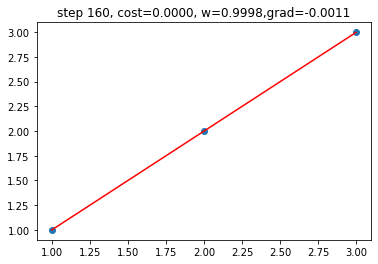

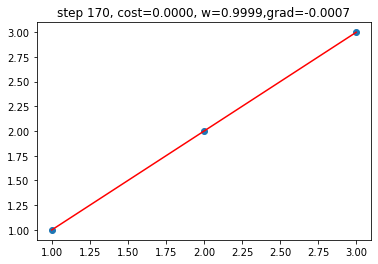

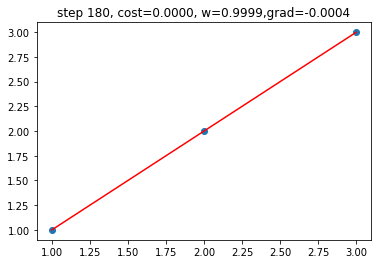

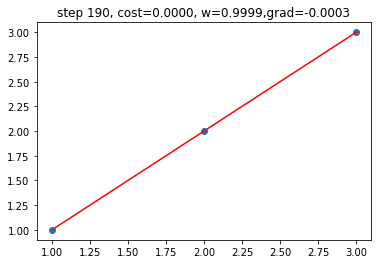

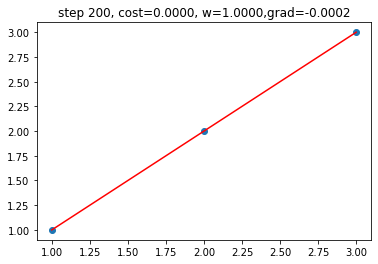

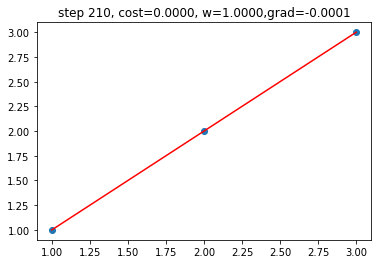

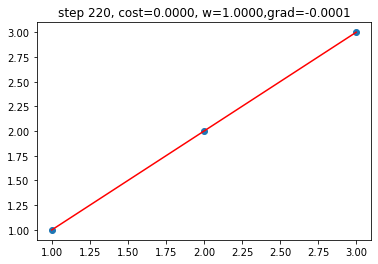

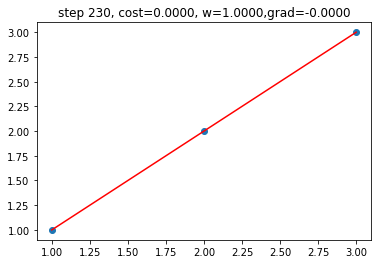

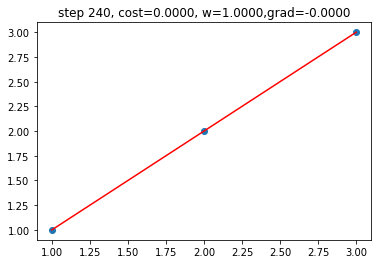

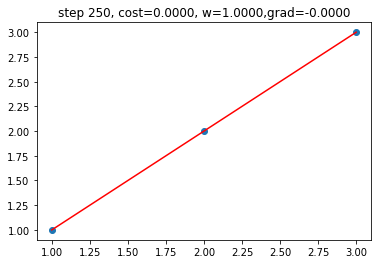

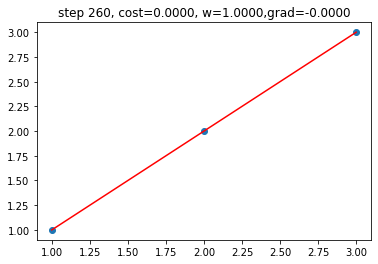

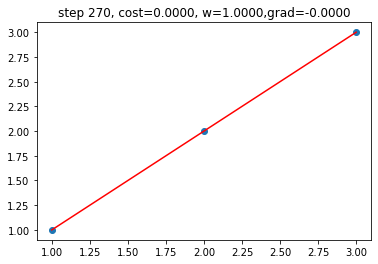

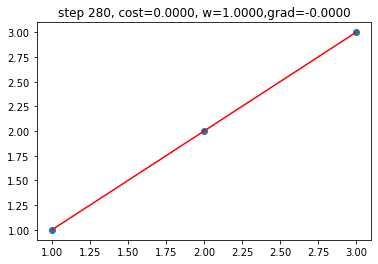

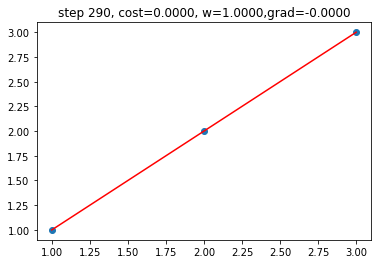

In [90]:
plt.ion()# 그림 갱신

lr= 0.01
epochs=300

for step in range(epochs):

    pred = x.mm(W) # x*W이 예측값
    cost = loss_fn(pred, y) # 예측값과 정답값 간의 손실 함수 계산
    gradient = (pred-y).view(-1).dot(x.view(-1)) / len(x) # 미리 계산된 미분값
    W -= lr * gradient # 업데이트
    
    if step % 10 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-') # 학습되는 양상을 그래프 선을 이용해 보여준다
        plt.title('step %d, cost=%.4f, w=%.4f,grad=%.4f' %  (step, cost.data, W.data[0], gradient.data))
        plt.show()

## 3.2 Linear Regression using nn.Module

### 선형 모델 정의

In [91]:
model = nn.Linear(1,1,bias=True)
print(model)

Linear(in_features=1, out_features=1, bias=True)


In [92]:
print(model.weight,model.bias) # There are weights, biases in the model defined

Parameter containing:
tensor([[-0.8798]], requires_grad=True) Parameter containing:
tensor([0.5437], requires_grad=True)


#### W.parameters를 실수로 뽑아내기

In [107]:
aa=[]
for i in model.parameters():
    aa.append(i)

print(type(x[0]),'\n\n',a[0].detach().numpy()[0][0])

NameError: ignored

### loss fn

In [93]:
cost_fn = nn.MSELoss()

## 옵티마이저

In [105]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # param만을 최적화하기 위해

### 모델 구축

In [109]:
model(x)

tensor([[-0.3360],
        [-1.2158],
        [-2.0956]], grad_fn=<AddmmBackward>)

### 모델 학습 

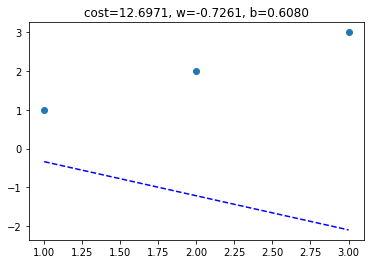

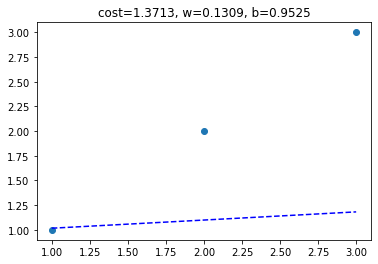

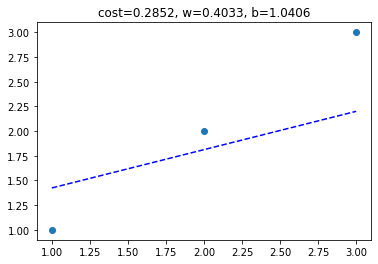

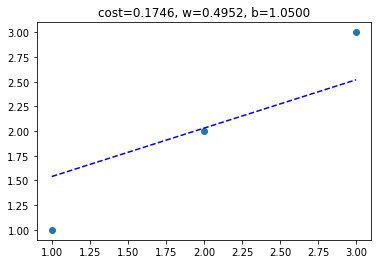

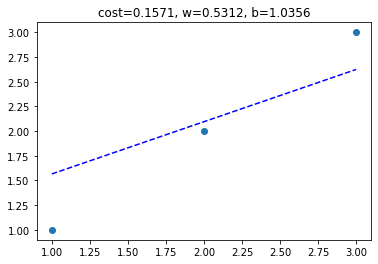

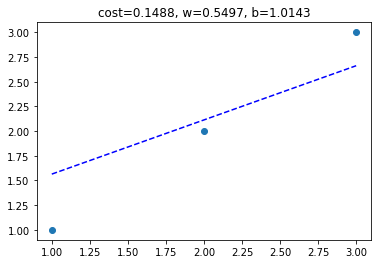

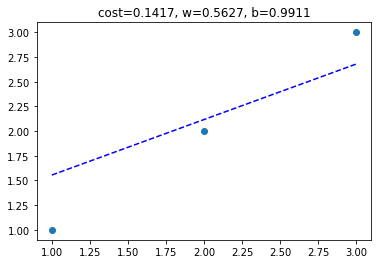

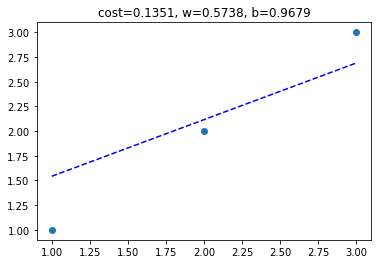

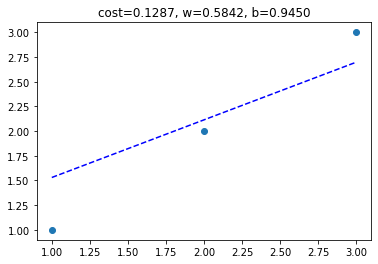

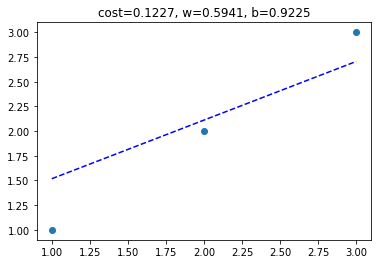

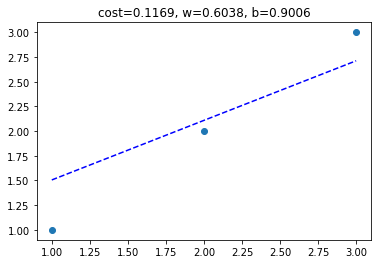

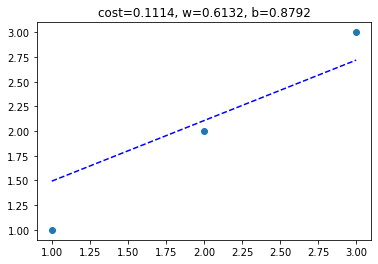

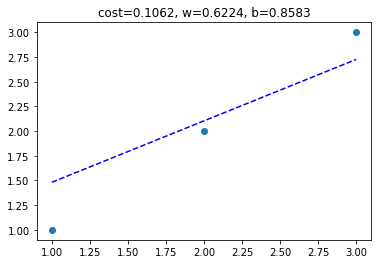

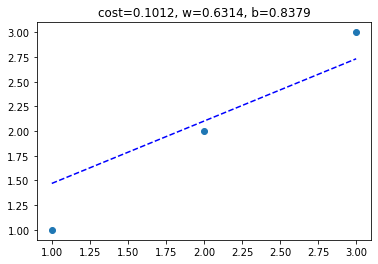

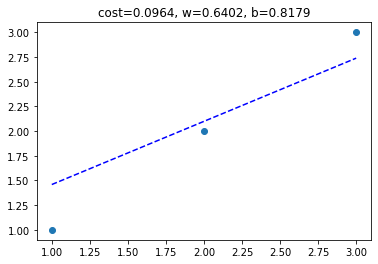

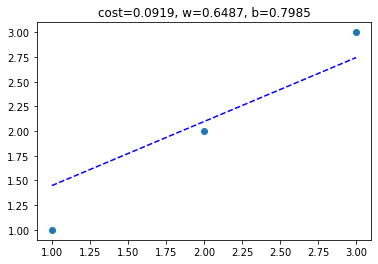

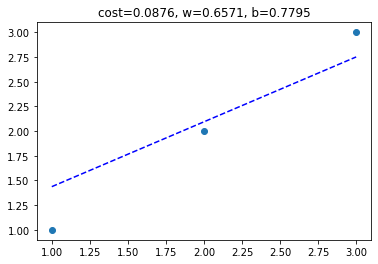

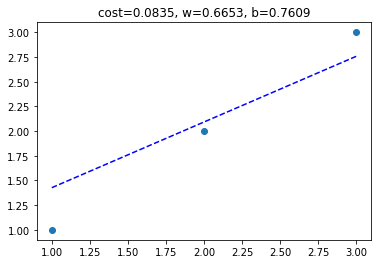

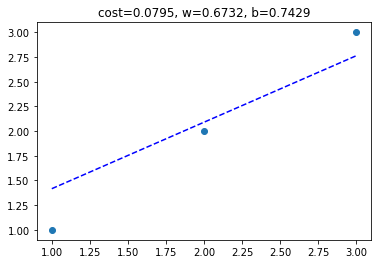

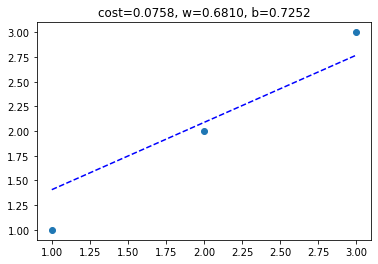

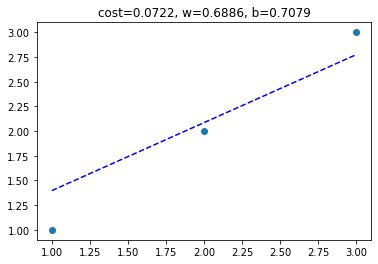

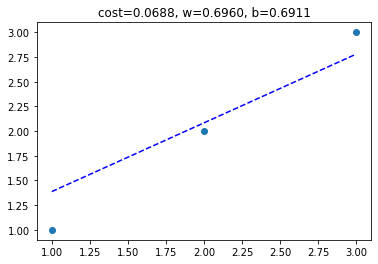

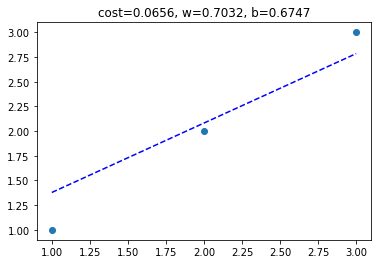

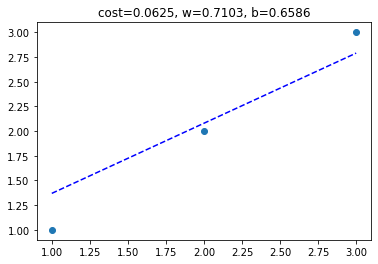

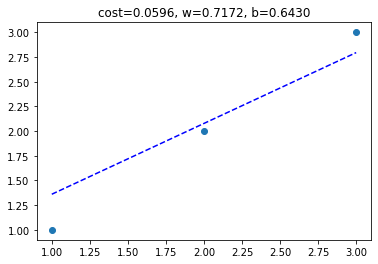

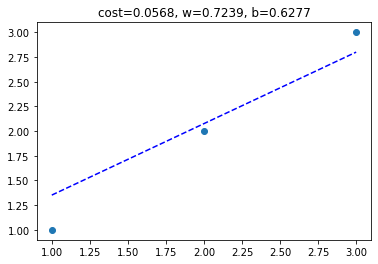

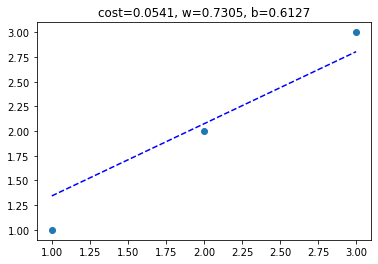

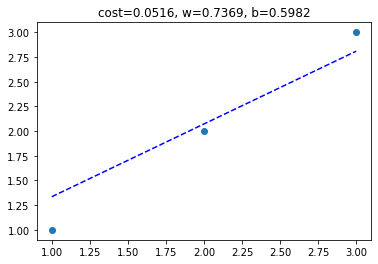

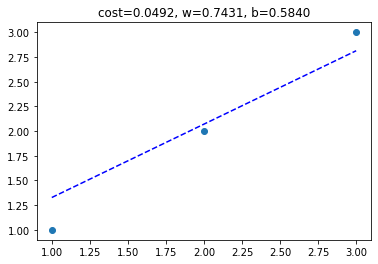

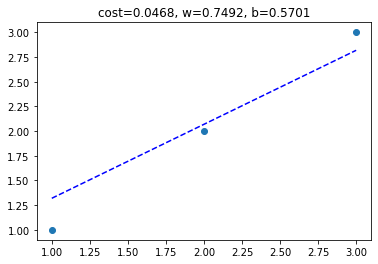

In [111]:
plt.ion() # 그림 갱신
epochs=300

for step in range(epochs):

    pred = model(x)  # 이미 정의된 W를 이용한 nn.Linear를 이용해 모델 구축한 것
    cost = loss_fn(pred,y)

    optimizer.zero_grad() #  autograd의 추적기록을 피하기 위해 학습 가능한 매개변수를 갖는 Tensor를 직접 0으로 조작하여 모델의 가중치를 갱신할 때 사용한다. 
                          #  왜냐하면 .backward()를 호출할 때마다 변화도가 buffer에 누적되기 때문이라고 한다. 아마도 변화도를 업데이트 하기 전에 초기화 하는 모양이다.
    cost.backward() # 역전파 구해준다
    optimizer.step() # 갱신

    if step % 10 ==0:
          
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'b--')
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data,model.weight.data[0][0],model.bias.data))
        plt.show()

plt.ioff()



[참고](https://green-late7.tistory.com/48)

### 테스트

In [112]:
x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))


input : 7.0000, output:5.8401


### 테스트셋 학습

In [114]:
for step in range(300):
    prediction = model(x)
    cost = loss_fn(prediction, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input : %.4f, output:%.4f' % (x_test.data[0][0], y_test.data[0][0]))

input : 7.0000, output:6.4366
